In [158]:
##EDA_adult_census_Income-Data

###Dataset linle : https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

#Census Income Data Set

**Abstract**: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset

**Attribute Information:**
* Total 14 independent Variable and 1 dependent Variable

*1. age: continuous.
*2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
*3. fnlwgt: continuous.
*4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
*5. education-num: continuous.
*6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
*7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
*8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
*9. sex: Female, Male.
*10. capital-gain: continuous.
*11. capital-loss: continuous.
*12. hours-per-week: continuous.
*14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**Target Variable**
income : Prediction task is to determine whether a person makes over 50K a year.

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [270]:
#Data Ingetions step
df = pd.read_csv('data/adult.data', names = ['age', 'workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'])

In [271]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [162]:
df.shape

(32561, 15)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [164]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [165]:
### No missing data present over data

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [167]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [168]:
# Check for duplicate records
df.duplicated().sum()

24

In [169]:
# Droup duplicate records, make is inplace equal to true
df.drop_duplicates(keep='first', inplace=True )

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [171]:
# Observation
## Total 32537 Rows and 15 columns
## Numeric Cols : 6, Categorical Cols : 9

In [172]:
for i in df.columns:
    print(df[i].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Pr

In [173]:
# Observation we are treating " ?" as NaN value 
# Check null Values
df.replace(' ?', 'NanN', inplace=True)

In [174]:
df.isnull()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

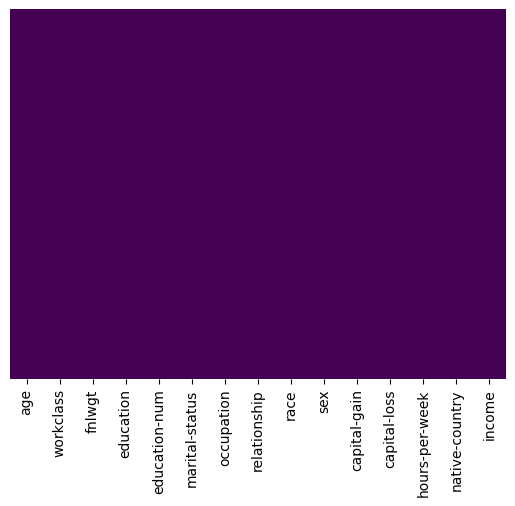

In [175]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [176]:
# Observation :
##worksclass, Occupation, native-country columns have missiing value

In [177]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [178]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Categorical Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


In [179]:
df[categorical_columns].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [180]:
df['workclass'].value_counts()

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
NanN                  1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [181]:
for i in df[categorical_columns]:
    print(f"\n Value counts for {i} column")
    print(df[i].value_counts())


 Value counts for workclass column
workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
NanN                  1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

 Value counts for education column
education
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: int64

 Value counts for marital-status column
marital-status
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      4

In [182]:
categorical_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

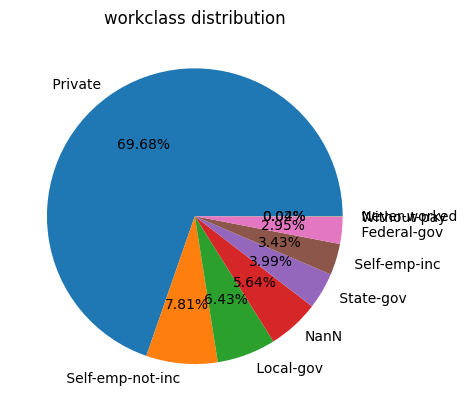

In [183]:
## distribution of independant categorical varibale -> workclass
income = df['workclass'].value_counts()
plt.pie(income,labels=income.index,autopct="%1.2f%%")
plt.title("workclass distribution")
plt.show()

In [184]:
#Observation : 73.85 % of workclass is occuioed by one category i.e. private and give 3/4 of contrubution


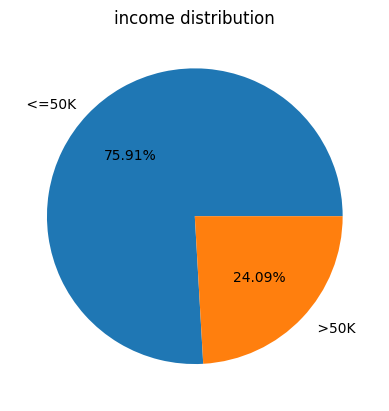

In [185]:
## distribution of our terget varibale -> income
income = df['income'].value_counts()
plt.pie(income,labels=income.index,autopct="%1.2f%%")
plt.title("income distribution")
plt.show()

In [186]:
# Observation : Almost 76 % of people earn less the 50 K

In [187]:
## Finding the Relationship between workclass and income
workclass_income = df.groupby('workclass')['income']
workclass_income.value_counts()

workclass          income
 Federal-gov        <=50K      589
                    >50K       371
 Local-gov          <=50K     1476
                    >50K       617
 Never-worked       <=50K        7
 Private            <=50K    17712
                    >50K      4961
 Self-emp-inc       >50K       622
                    <=50K      494
 Self-emp-not-inc   <=50K     1816
                    >50K       724
 State-gov          <=50K      945
                    >50K       353
 Without-pay        <=50K       14
NanN                <=50K     1645
                    >50K       191
Name: count, dtype: int64

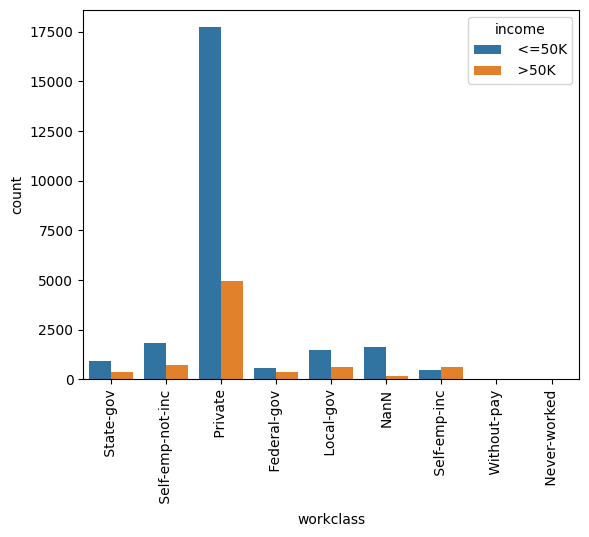

In [188]:

sns.countplot(df,x='workclass',hue='income')
plt.xticks(rotation=90)
plt.show()

In [189]:
# Observation : Most of the workclass have the greater count of peopel who earn less than 50 K.
# Exception is self-emp-inc workclass


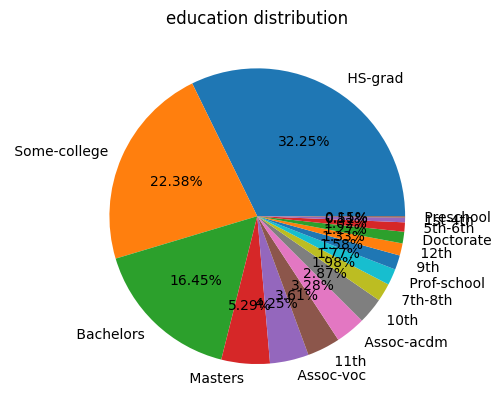

In [190]:
## Education -> distribution of independant categorical varibale 
income = df['education'].value_counts()
plt.pie(income,labels=income.index,autopct="%1.2f%%")
plt.title("education distribution")
plt.show()

education      income
 10th           <=50K     871
                >50K       62
 11th           <=50K    1115
                >50K       60
 12th           <=50K     400
                >50K       33
 1st-4th        <=50K     160
                >50K        6
 5th-6th        <=50K     316
                >50K       16
 7th-8th        <=50K     605
                >50K       40
 9th            <=50K     487
                >50K       27
 Assoc-acdm     <=50K     802
                >50K      265
 Assoc-voc      <=50K    1021
                >50K      361
 Bachelors      <=50K    3132
                >50K     2221
 Doctorate      >50K      306
                <=50K     107
 HS-grad        <=50K    8820
                >50K     1674
 Masters        >50K      959
                <=50K     763
 Preschool      <=50K      50
 Prof-school    >50K      423
                <=50K     153
 Some-college   <=50K    5896
                >50K     1386
Name: count, dtype: int64


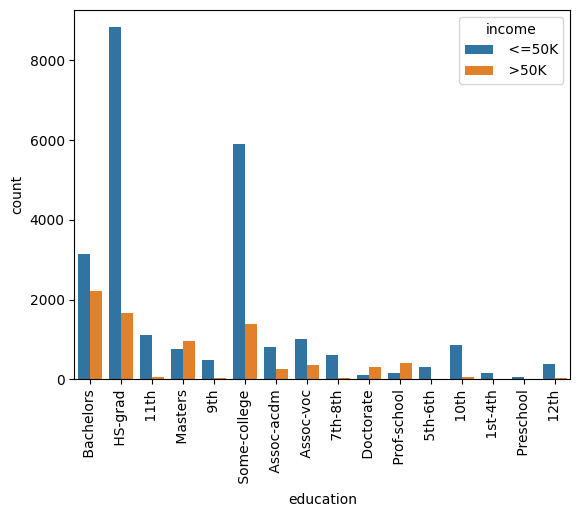

In [191]:
## Finding the Relationship between education and income
edu_income = df.groupby('education')['income']
print(edu_income.value_counts())
sns.countplot(df,x='education',hue='income')
plt.xticks(rotation=90)
plt.show()

In [192]:
## Observation
# 1. Maximum count of who earn less than 50K are having 11th as education and has count 1115 
# 2. People having Masters, Doctorate and Prof-school eduction have more count of people who earn more than 50 k.
# 3. Other eductin having people have more count who eran less than 50 K  

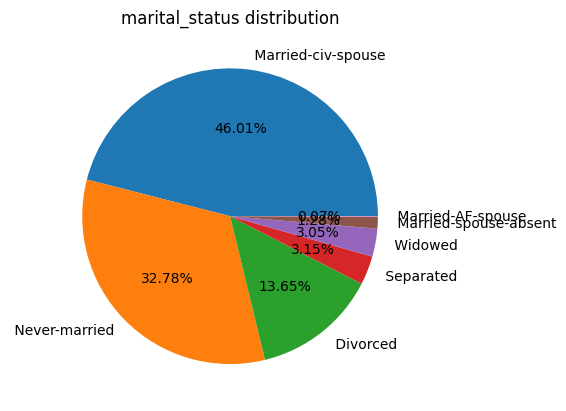

In [193]:
# marital-status-> distribution of Categorical feature
marital_status = df['marital-status'].value_counts()
plt.pie(marital_status,labels=marital_status.index,autopct="%1.2f%%")
plt.title("marital_status distribution")
plt.show()

marital-status          income
 Divorced                <=50K     3978
                         >50K       463
 Married-AF-spouse       <=50K       13
                         >50K        10
 Married-civ-spouse      <=50K     8280
                         >50K      6690
 Married-spouse-absent   <=50K      384
                         >50K        34
 Never-married           <=50K    10176
                         >50K       491
 Separated               <=50K      959
                         >50K        66
 Widowed                 <=50K      908
                         >50K        85
Name: count, dtype: int64


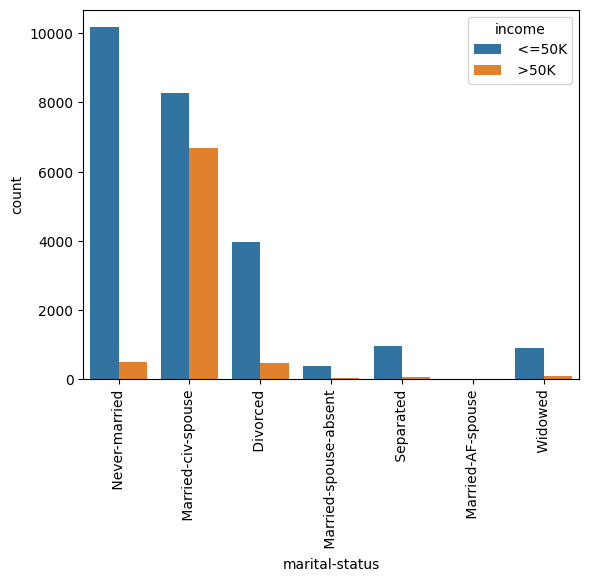

In [194]:
## Finding the Relationship between marital-status and income
marital_status_income = df.groupby('marital-status')['income']
print(marital_status_income.value_counts())
sns.countplot(df,x='marital-status',hue='income')
plt.xticks(rotation=90)
plt.show()

In [195]:
## Observations
#1. Max people falls in category of Married-civ-spouse 
#2. Never-married people have maximume count of earing less than 50 K
#3. The differnece between two income groups in Never-married column is very high


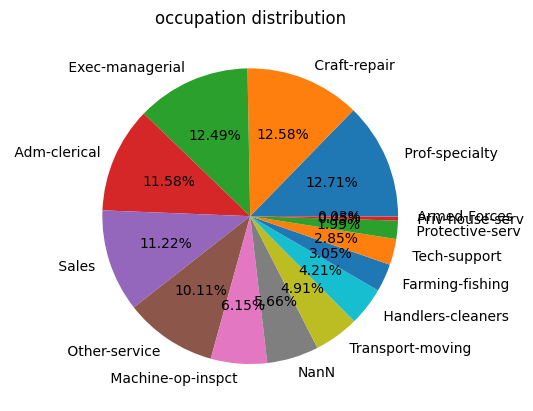

In [196]:
## Distribution of Occupation feature
occupation = df['occupation'].value_counts()
13
plt.pie(occupation,labels=occupation.index,autopct="%1.2f%%")
plt.title("occupation distribution")
plt.show()

occupation          income
 Adm-clerical        <=50K    3261
                     >50K      507
 Armed-Forces        <=50K       8
                     >50K        1
 Craft-repair        <=50K    3165
                     >50K      929
 Exec-managerial     <=50K    2097
                     >50K     1968
 Farming-fishing     <=50K     877
                     >50K      115
 Handlers-cleaners   <=50K    1283
                     >50K       86
 Machine-op-inspct   <=50K    1751
                     >50K      249
 Other-service       <=50K    3154
                     >50K      137
 Priv-house-serv     <=50K     146
                     >50K        1
 Prof-specialty      <=50K    2278
                     >50K     1858
 Protective-serv     <=50K     438
                     >50K      211
 Sales               <=50K    2667
                     >50K      983
 Tech-support        <=50K     644
                     >50K      283
 Transport-moving    <=50K    1277
                     >50K   

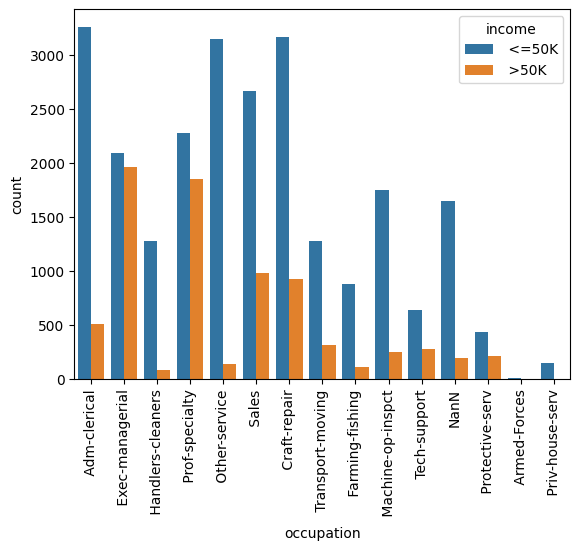

In [197]:
## Finding the Relationship between occupation and income
occupation_income = df.groupby('occupation')['income']
print(occupation_income.value_counts())
sns.countplot(df,x='occupation',hue='income')
plt.xticks(rotation=90)
plt.show()

In [198]:
##Observation
#1. Exec-managerial and Prof-speciality occupation has the mox people eraning greater than 50 K
#2. Adm-clerical occupation has the mox people eraning greater less 50 K

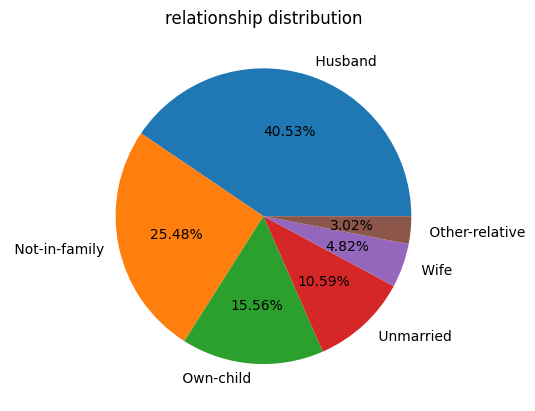

In [199]:
 ## Distribution of relationship feature
relationship = df['relationship'].value_counts()
plt.pie(relationship,labels=relationship.index,autopct="%1.2f%%")
plt.title("relationship distribution")
plt.show()


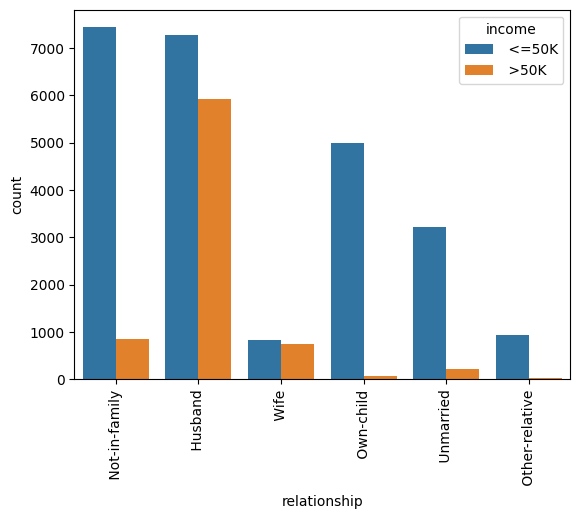

In [200]:
# relationship between relationship and income feature
sns.countplot(df,x='relationship',hue='income')
plt.xticks(rotation=90)
plt.show()


In [201]:
## Observations
#1. Husband are earning more than 50 K
#2. more people are the who earn less than 50 K are belong to Not-in-family
#3. 40.53 % population is husband

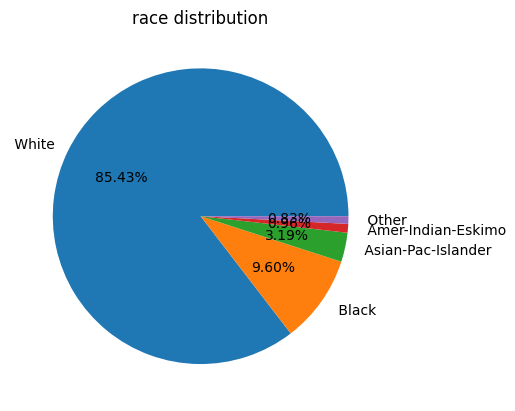

In [202]:
 ## Distribution of race feature
race = df['race'].value_counts()
plt.pie(race,labels=race.index,autopct="%1.2f%%")
plt.title("race distribution")
plt.show()


race                 income
 Amer-Indian-Eskimo   <=50K      275
                      >50K        36
 Asian-Pac-Islander   <=50K      762
                      >50K       276
 Black                <=50K     2735
                      >50K       387
 Other                <=50K      246
                      >50K        25
 White                <=50K    20680
                      >50K      7115
Name: count, dtype: int64


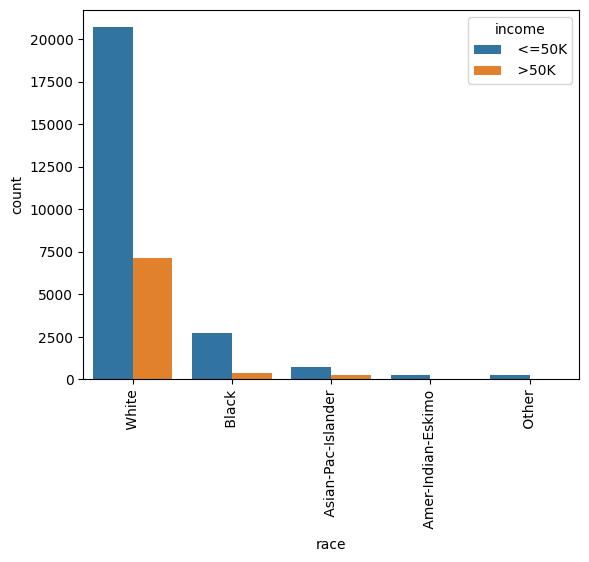

In [203]:
## Finding the Relationship between race and income
race_income = df.groupby('race')['income']
print(race_income.value_counts())
sns.countplot(df,x='race',hue='income')
plt.xticks(rotation=90)
plt.show()

In [204]:
##Obsevation
#1. White People earn >50 and compare to other race
#2. Most of the populatin is of white people 

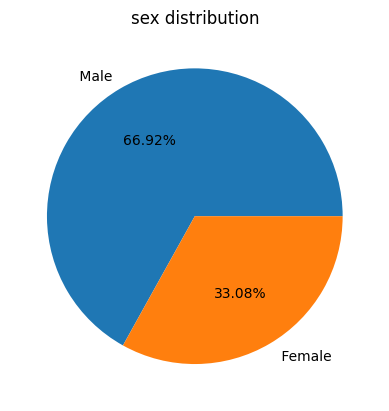

In [205]:
 ## Distribution of sex feature
sex = df['sex'].value_counts()
plt.pie(sex,labels=sex.index,autopct="%1.2f%%")
plt.title("sex distribution")
plt.show()

sex      income
 Female   <=50K     9583
          >50K      1179
 Male     <=50K    15115
          >50K      6660
Name: count, dtype: int64


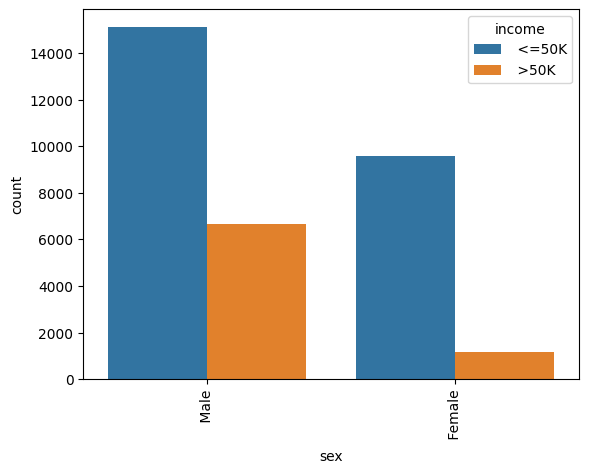

In [206]:
## Finding the Relationship between sex and income
sex_income = df.groupby('sex')['income']
print(sex_income.value_counts())
sns.countplot(df,x='sex',hue='income')
plt.xticks(rotation=90)
plt.show()

In [207]:
##Observation
#1. Mostly male contribute more in earning 67 %
#2. As compare to female male earn more > 50K

In [208]:
## unique values in native-country feature
df['native-country'].nunique()

42

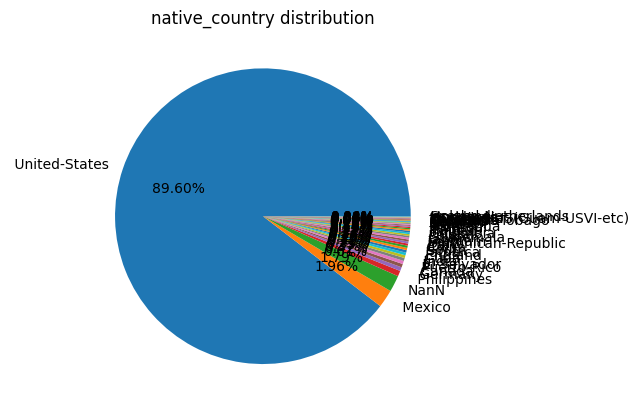

In [209]:
 ## Distribution of native-country feature
native_country = df['native-country'].value_counts()
plt.pie(native_country,labels=native_country.index,autopct="%1.2f%%")
plt.title("native_country distribution")
plt.show()


native-country  income
 Cambodia        <=50K     12
                 >50K       7
 Canada          <=50K     82
                 >50K      39
 China           <=50K     55
                         ... 
 Vietnam         >50K       5
 Yugoslavia      <=50K     10
                 >50K       6
NanN             <=50K    436
                 >50K     146
Name: count, Length: 82, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, 'NanN'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),


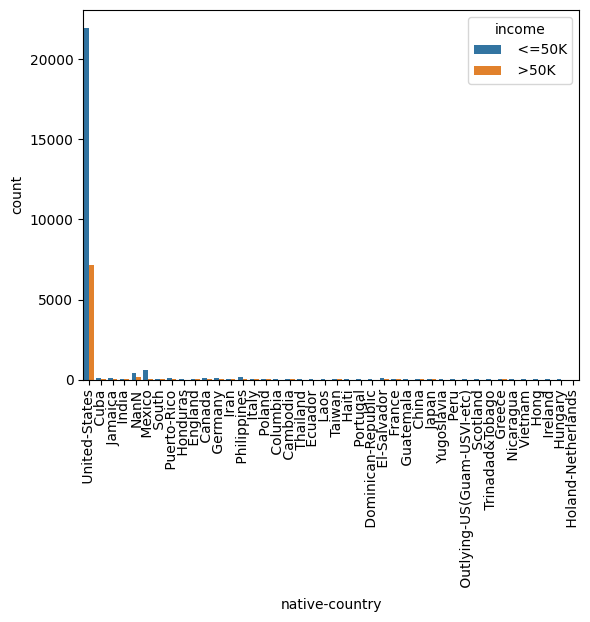

In [210]:
## Finding the Relationship between native-country and income
native_country_income = df.groupby('native-country')['income']
print(native_country_income.value_counts())
sns.countplot(df,x='native-country',hue='income')
plt.xticks(rotation=90)

In [211]:
## Observation :
#1. United-states contribute more 91.23 %
#2. United-states have more count who earn more than 50k
#3. 41 unique country available

In [212]:
# Numerical Data EDA

In [213]:
numerical_columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

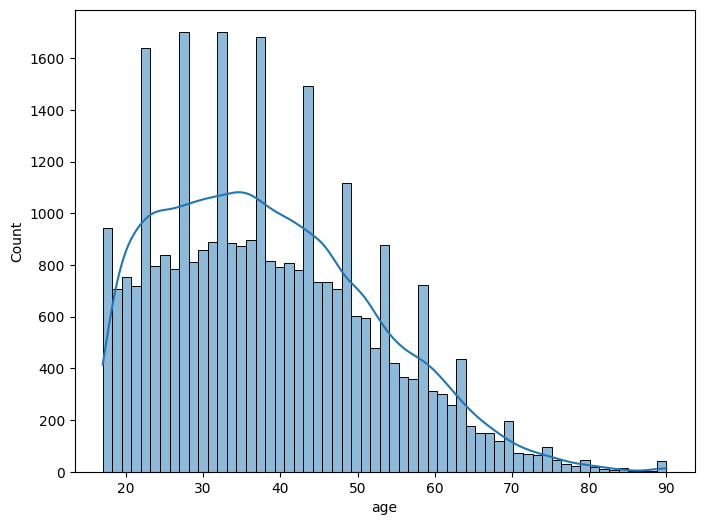

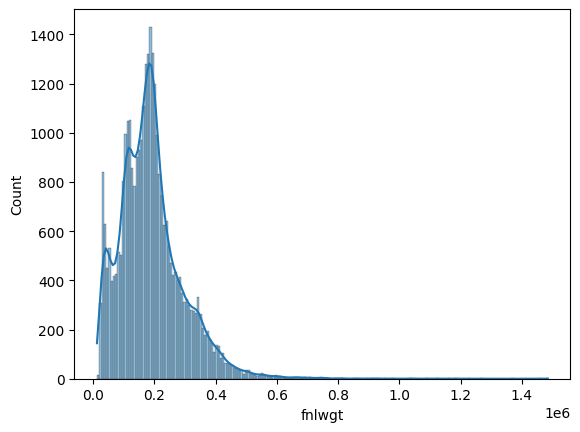

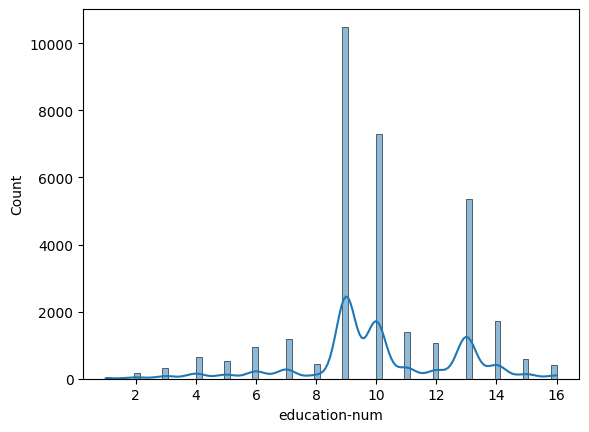

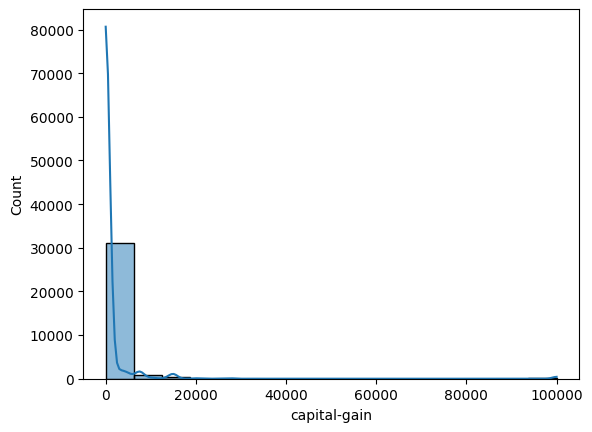

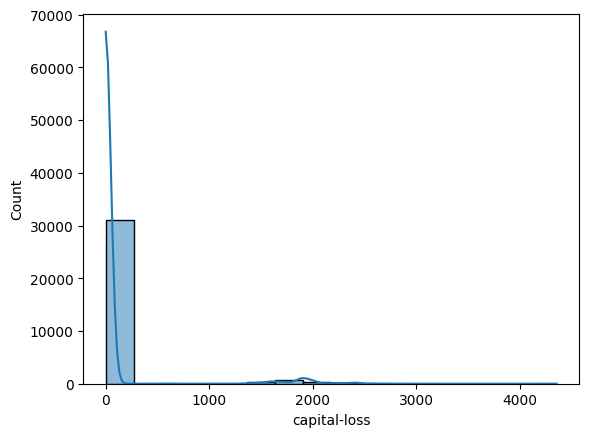

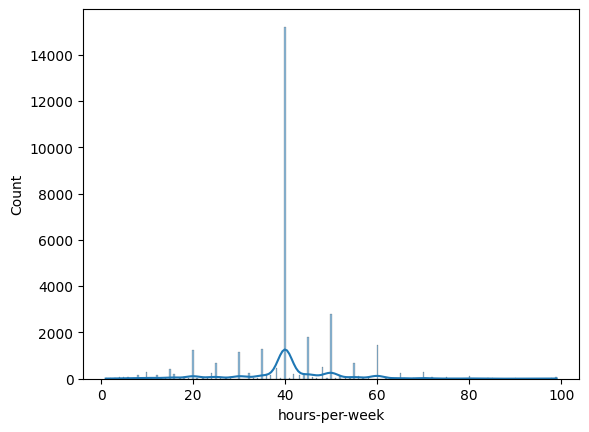

In [214]:
#Distribution of numerical column
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

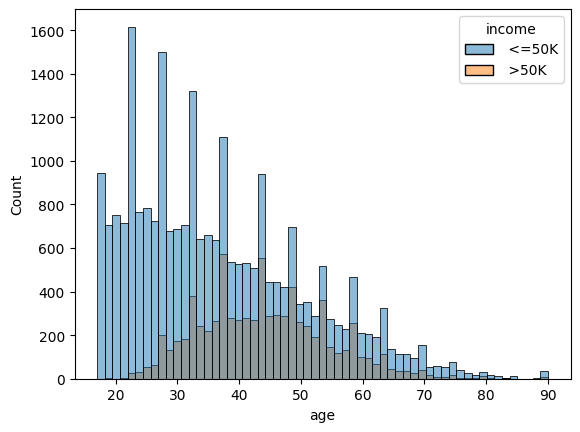

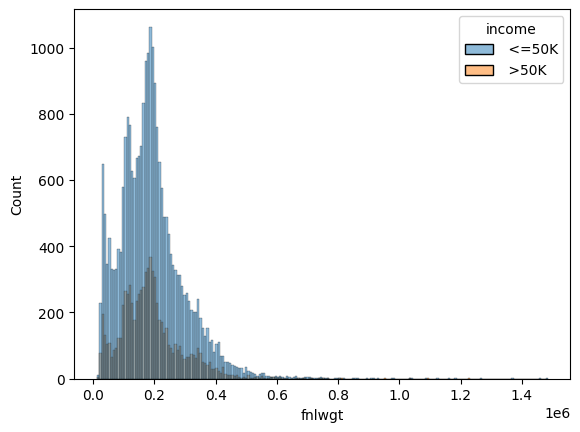

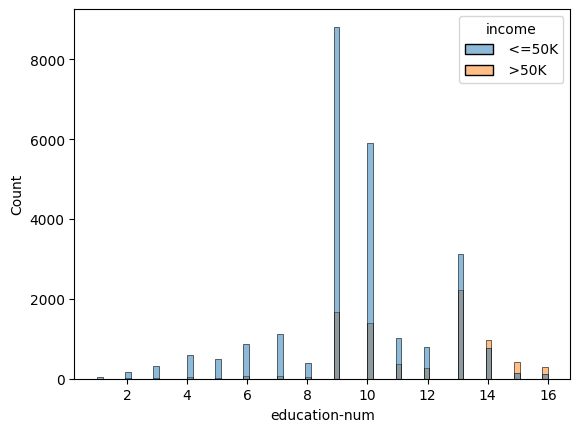

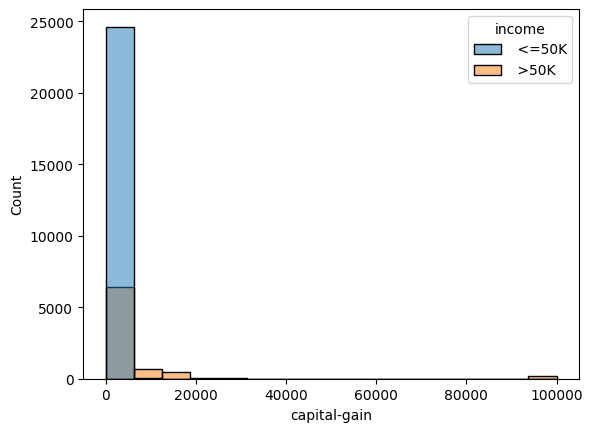

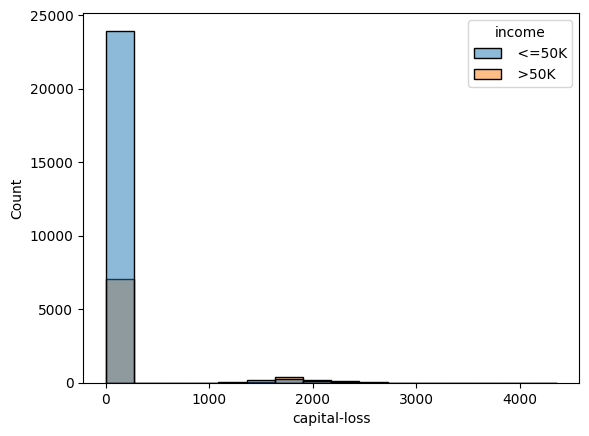

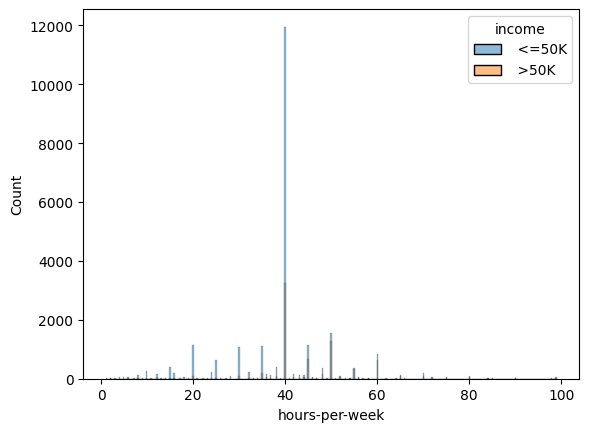

<Figure size 640x480 with 0 Axes>

In [215]:
for feature in numerical_columns:
    sns.histplot(df,x=feature,hue='income')
    plt.show()
    plt.tight_layout()

In [216]:
## Observations
#1. In ‘age’ column, most of the people earning >50K follows a different distribution than  ‘age’ column distribution.
#2. People with higher-education, are earning more income.
#3. More the capital-gain, more income(>50K).

<Axes: >

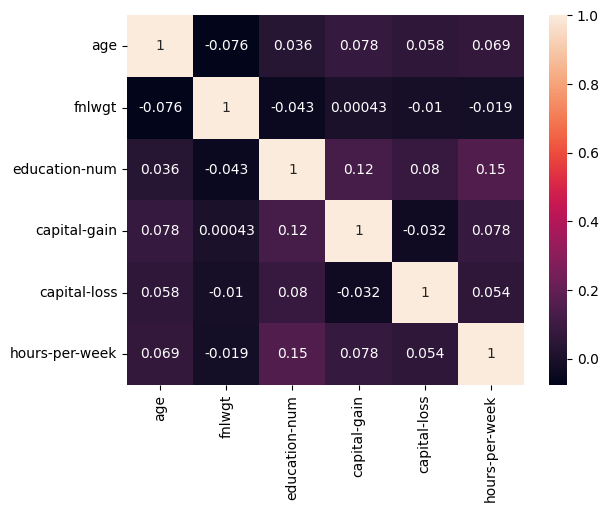

In [217]:
## correlation
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [218]:
s = pd.crosstab(df['hours-per-week'],df['income'],normalize="index")


In [219]:
fig= px.bar(s,color_discrete_sequence=['#c789f0','#f0927a'])
fig.show()


In [221]:
df[numerical_columns].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


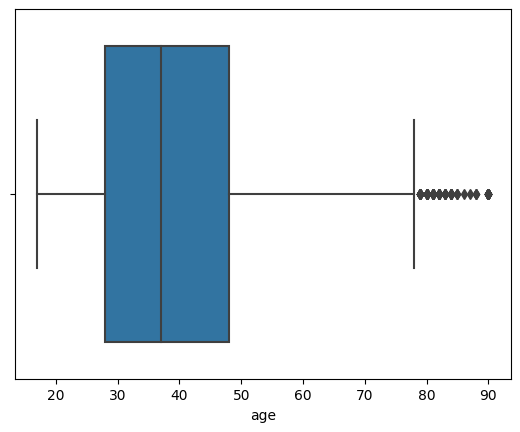

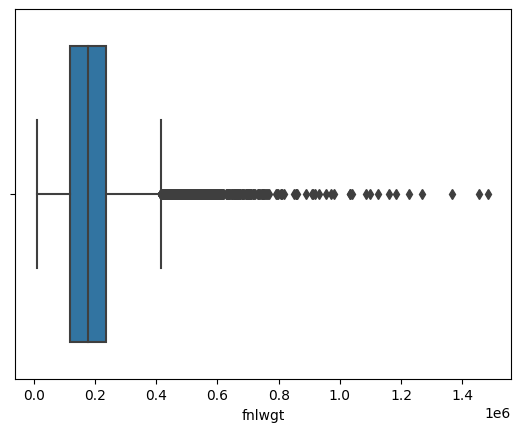

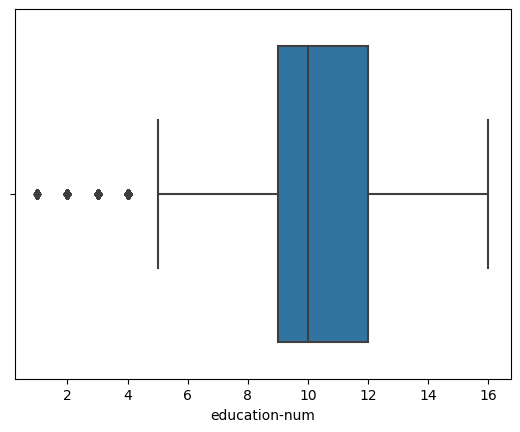

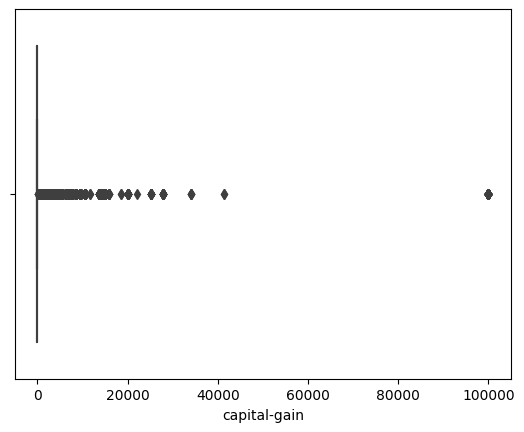

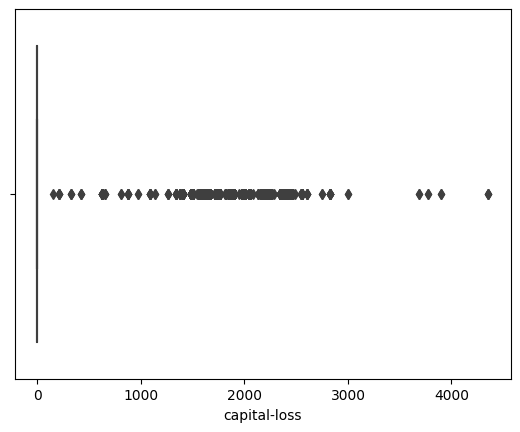

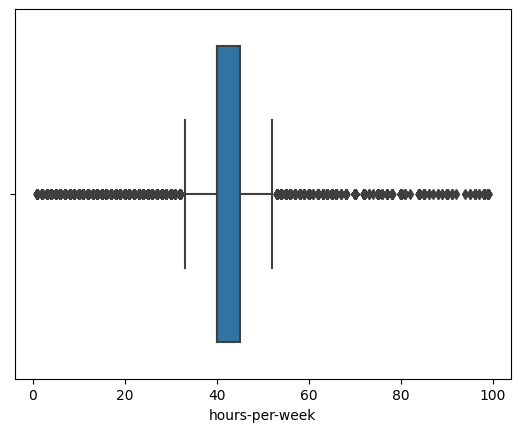

In [222]:
for feature in numerical_columns:
    sns.boxplot(x=df[feature])
    plt.show()


In [223]:
##Observatins
#AGE :
    #1. The age column is sightly right-skewed or postively skewed.
    #2. Capital gain and capital loss are mostly 0
    #3. In ‘hours-per-week’ column, most datapoints are concentrated on 40.

In [272]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [274]:
df['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [275]:
df['workclass'].replace('NanN', " Private", inplace=True)

In [276]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [277]:
workclass_map = {' State-gov' : 1, ' Self-emp-not-inc' : 2, ' Private' : 3, ' Federal-gov' : 4,
       ' Local-gov' : 5, ' Self-emp-inc' : 6, ' Without-pay' : 7, ' Never-worked' : 8}

In [278]:
categorical_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [279]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [280]:
education_map = {' Bachelors': 1, ' HS-grad' : 2 , ' 11th' : 3, ' Masters' : 4, ' 9th' : 5,
       ' Some-college' : 6, ' Assoc-acdm' : 7, ' Assoc-voc' : 8, ' 7th-8th' : 9,
       ' Doctorate' : 10, ' Prof-school' : 11, ' 5th-6th' : 12, ' 10th' : 13, ' 1st-4th' : 14,
       ' Preschool' : 15, ' 12th' : 16}

In [281]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [282]:
marital_status_map = {' Never-married' : 1, ' Married-civ-spouse' : 2, ' Divorced' : 3,
       ' Married-spouse-absent' : 4, ' Separated' : 5, ' Married-AF-spouse' : 6,
       ' Widowed' : 7}


In [283]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [284]:
occupation_map = {' Adm-clerical' : 1, ' Exec-managerial' : 2, ' Handlers-cleaners' : 3,
       ' Prof-specialty' : 4, ' Other-service' : 5, ' Sales' : 6, ' Craft-repair' : 7,
       ' Transport-moving' : 8, ' Farming-fishing' : 9, ' Machine-op-inspct' : 10,
       ' Tech-support' :11, 'NanN' :12, ' Protective-serv' : 13, ' Armed-Forces' :14,
       ' Priv-house-serv' : 15}

In [285]:
categorical_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [286]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [287]:
relationship_map = {' Not-in-family' : 1, ' Husband' : 2, ' Wife' : 3, ' Own-child' : 4, ' Unmarried' : 5,
       ' Other-relative' : 6}

In [288]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [289]:
race_map = {' White' : 1, ' Black' : 2, ' Asian-Pac-Islander' : 3, ' Amer-Indian-Eskimo' : 4,
       ' Other' : 5}

In [290]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [291]:
sex_map = {' Male' : 1, ' Female' : 2}

In [292]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [293]:
native_country_map = {' United-States'  :1, ' Cuba' :2, ' Jamaica' :3, ' India' :4, 'NanN' :5, ' Mexico' :6,
       ' South' :7, ' Puerto-Rico' :8, ' Honduras' :9, ' England' :10, ' Canada' : 11,
       ' Germany' :12, ' Iran' :13, ' Philippines' :14, ' Italy' :15, ' Poland' :16,
       ' Columbia' :17, ' Cambodia' :18, ' Thailand' :19, ' Ecuador': 20, ' Laos' :21,
       ' Taiwan' :22, ' Haiti' :23, ' Portugal' :24, ' Dominican-Republic' :25,
       ' El-Salvador' :26, ' France' :27, ' Guatemala' :28, ' China' :29, ' Japan' :30,
       ' Yugoslavia' :31, ' Peru' :32, ' Outlying-US(Guam-USVI-etc)' :33, ' Scotland' :34,
       ' Trinadad&Tobago' :35, ' Greece' :36, ' Nicaragua' :37, ' Vietnam' :38, ' Hong' :39,
       ' Ireland' :40, ' Hungary' :41, ' Holand-Netherlands' :42}

In [294]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [295]:
income_map = {' <=50K' :0, ' >50K': 1}

In [296]:
categorical_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [298]:
df['workclass'] = df['workclass'].map(workclass_map)
df['education'] = df['education'].map(education_map)
df['marital-status'] = df['marital-status'].map(marital_status_map)
df['occupation'] = df['occupation'].map(occupation_map)
df['relationship'] = df['relationship'].map(relationship_map)
df['race'] = df['race'].map(race_map)
df['sex'] = df['sex'].map(sex)
df['native_country'] = df['native-country'].map(native_country_map)
df['income'] = df['income'].map(income_map)

In [300]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,native_country
0,39,NaN,77516,NaN,13,NaN,NaN,NaN,NaN,NaN,2174,0,40,United-States,0,1.0
1,50,NaN,83311,NaN,13,NaN,NaN,NaN,NaN,NaN,0,0,13,United-States,0,1.0
2,38,NaN,215646,NaN,9,NaN,NaN,NaN,NaN,NaN,0,0,40,United-States,0,1.0
3,53,NaN,234721,NaN,7,NaN,NaN,NaN,NaN,NaN,0,0,40,United-States,0,1.0
4,28,NaN,338409,NaN,13,NaN,NaN,NaN,NaN,NaN,0,0,40,Cuba,0,2.0


In [301]:
df.drop(labels='native-country', axis=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,native_country
0,39,NaN,77516,NaN,13,NaN,NaN,NaN,NaN,NaN,2174,0,40,0,1.0
1,50,NaN,83311,NaN,13,NaN,NaN,NaN,NaN,NaN,0,0,13,0,1.0
2,38,NaN,215646,NaN,9,NaN,NaN,NaN,NaN,NaN,0,0,40,0,1.0
3,53,NaN,234721,NaN,7,NaN,NaN,NaN,NaN,NaN,0,0,40,0,1.0
4,28,NaN,338409,NaN,13,NaN,NaN,NaN,NaN,NaN,0,0,40,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,NaN,257302,NaN,12,NaN,NaN,NaN,NaN,NaN,0,0,38,0,1.0
32557,40,NaN,154374,NaN,9,NaN,NaN,NaN,NaN,NaN,0,0,40,1,1.0
32558,58,NaN,151910,NaN,9,NaN,NaN,NaN,NaN,NaN,0,0,40,0,1.0
32559,22,NaN,201490,NaN,9,NaN,NaN,NaN,NaN,NaN,0,0,20,0,1.0
